In [1]:
import healpy as hp
import numpy as np
import astropy.coordinates as coord
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from skimage.feature import peak_local_max
import numpy as np

In [2]:
%store -r lon
%store -r lat
%store -r xsize
%store -r reso

In [41]:
%store -r table_detections

In [42]:
duplicates = table_detections[table_detections.duplicated(subset='S(Jy)', keep=False)]
duplicates = duplicates.sort_values(by='S(Jy)', ascending = False)

In [ ]:
duplicates_lon = duplicates['lon(°)']
duplicates_lat = duplicates['lat(°)']

In [ ]:
duplicates_lon_pred = duplicates['pred_lon']
duplicates_lat_pred = duplicates['pred_lat']

In [ ]:
duplicates_lon_rad = np.radians(duplicates_lon)
duplicates_lat_rad = np.radians(duplicates_lat)

In [6]:
duplicates_lon_pred_rad = np.radians(duplicates_lon_pred)
duplicates_lat_pred_rad = np.radians(duplicates_lat_pred)

In [10]:
lon_rad = np.radians(lon)
lat_rad = np.radians(lat)

In [11]:
def convert_lonlat_to_patch_position(lon_PS, lat_PS, lon_PS_rad, lat_PS_rad, lon = lon, lat = lat, xsize = xsize, reso = reso):
    patch_positions = []

    for lon_PS_rad, lat_PS_rad, lon_PS, lat_PS in zip(lon_PS_rad, lat_PS_rad, lon_PS, lat_PS):
        
        patch_index = np.argmin(coord.angular_separation(lon_PS_rad, lat_PS_rad, lon_rad, lat_rad))

        patch_lon, patch_lat = lon[patch_index], lat[patch_index]

        proj = hp.projector.GnomonicProj(ysize=xsize, xsize=xsize, rot=(patch_lon, patch_lat, 0), reso=reso)
        x, y = proj.ang2xy(lon_PS, lat_PS, lonlat=True)
        i,j = proj.xy2ij(x = x, y = y)


        patch_positions.append((patch_index, i, j))

    return patch_positions

In [13]:
duplicates_patches_pred = convert_lonlat_to_patch_position(duplicates_lon_pred, duplicates_lat_pred, duplicates_lon_pred_rad, duplicates_lat_pred_rad)

In [14]:
duplicates_patches = convert_lonlat_to_patch_position(duplicates_lon, duplicates_lat, duplicates_lon_rad, duplicates_lat_rad)

In [18]:
unique_duplicates_patches = list(set(duplicates_patches))
seen = set()
unique_duplicates_patches = [x for x in duplicates_patches if not (x in seen or seen.add(x))]

In [107]:
patch_numbers = [item[0] for item in unique_duplicates_patches]
peak_x_obs = [item[2] for item in unique_duplicates_patches]
peak_y_obs = [item[1] for item in unique_duplicates_patches]

In [31]:
%store -r prediction_P_64pix_9epoch_10batch_sol

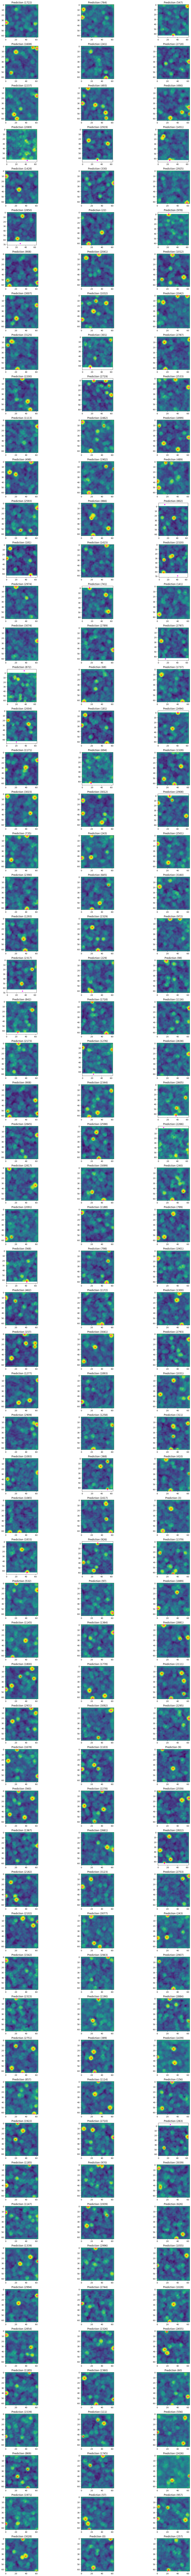

In [110]:
fig, axes = plt.subplots(62, 3, figsize=(18, 180))

for i, (patch_number, peak_x, peak_y) in enumerate(zip(patch_numbers, peak_x_obs, peak_y_obs)):
    # Plotting
    ax = axes[i // 3, i % 3]  
    sc = ax.imshow(np.squeeze(prediction_P_64pix_9epoch_10batch_sol[patch_number]), norm=LogNorm())
    ax.scatter(x=peak_local_max(np.squeeze(prediction_P_64pix_9epoch_10batch_sol[patch_number]), threshold_abs=0.3, min_distance=5, exclude_border=False)[:, 1],
                y=peak_local_max(np.squeeze(prediction_P_64pix_9epoch_10batch_sol[patch_number]), threshold_abs=0.3, min_distance=5, exclude_border=False)[:, 0], c='red', marker='x')
    ax.scatter(x=peak_x, y=peak_y, color='magenta', s=20)
    ax.scatter(x=peak_x, y=peak_y, color='magenta', s=20)
    ax.set_title(f"Prediction ({patch_number})")

plt.tight_layout()
plt.show()
